<IPython.core.display.Javascript object>


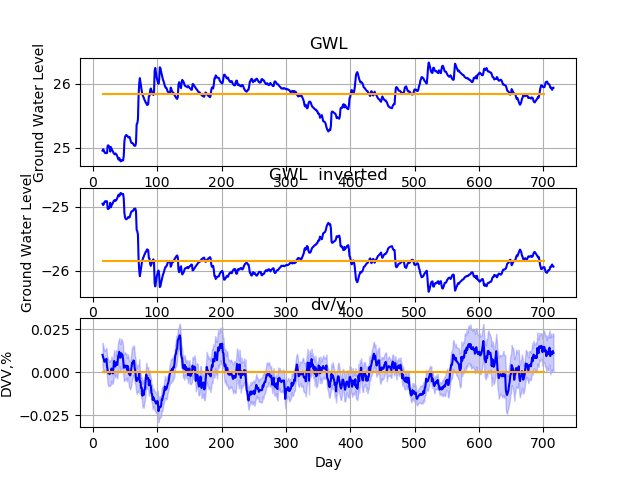

<IPython.core.display.Javascript object>


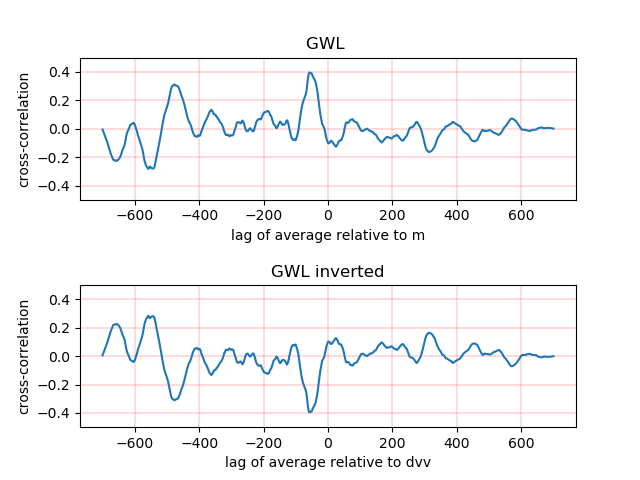

min correlation is at lag -559
max correlation is at lag -559
correlation at lag=0; 0.100647674545
Max correlation at: 0.282582884606


<IPython.core.display.Javascript object>


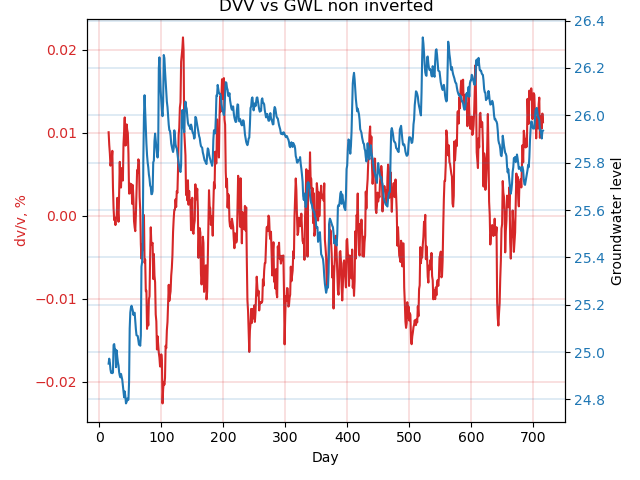

<IPython.core.display.Javascript object>


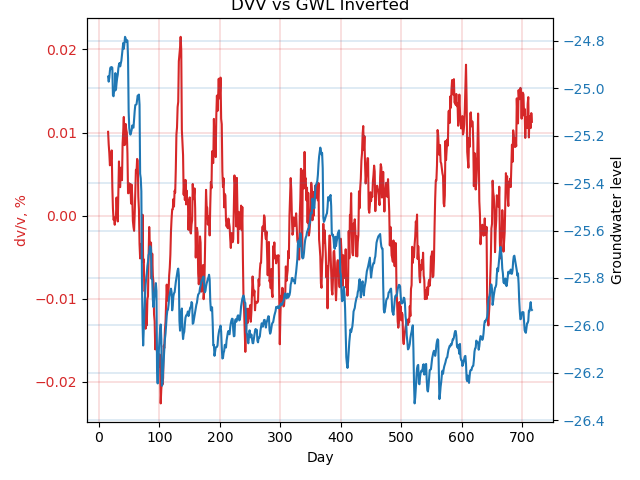

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import csv                         #
from datetime import datetime           #import the librairies   
from collections import defaultdict 
import csv
import pandas as pd
from numpy import linalg as LA
%matplotlib notebook 

#values = 
pairname='ALL'
window=30
filter='1'

pair=np.genfromtxt('/home/csmi310/msnoise/dvv/'+pairname+'-m'+str(window)+'-f'+filter+'.csv', delimiter=',', 
                    usecols=[2,3,6,7],skip_header=int(window), skip_footer=0)  

m=pair[:,0]
em=pair[:,1]
m0=pair[:,2]
em0=pair[:,3]


mean=m0
error=em0

gw = np.genfromtxt('/home/csmi310/msnoise/GWL 2017-2019-full.csv', delimiter=',',
                usecols=[1,2,3,4,5,6,7,8,9,10,11],skip_header=int(window/2),skip_footer=int(window/2))
anglestreet=gw[:,0]  #not good match at all
brucepullman=gw[:,1]
douglasrd=gw[:,2]
hamlin=gw[:,3]
leslie=gw[:,4]
mauku=gw[:,5]
millrd=gw[:,6]
omaha=gw[:,7]
stlukes=gw[:,8]
parakai=gw[:,9]
average=gw[:,10]
newaverage=(np.array(hamlin)+np.array(leslie)+np.array(mauku)+
        np.array(millrd)+np.array(omaha)+np.array(stlukes)+np.array(douglasrd))/7
epazhbaz=(np.array(stlukes)+np.array(leslie))/2

length=len(mean)
start =round(window/2) 
x = []
for i in range(length):
    x.append(start + i)
    

station=newaverage

ave=np.sum(station)/len(station)

stationfix=-station

plt.subplot(3, 1, 1)
plt.plot(x, station, '-',c='blue')
plt.plot([start,length],[ave,ave],color='orange')
plt.title('GWL')
plt.ylabel('Ground Water Level')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(x, stationfix, '-',c='blue')
plt.plot([start,length],[-ave,-ave],color='orange')
plt.title('GWL  inverted')
plt.ylabel('Ground Water Level')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(x, mean, '-',color='blue')
plt.plot([start,length],[0,0],color='orange')
plt.fill_between(x, mean-error, mean+error, alpha=0.2, color='blue')
plt.title('dv/v')
plt.xlabel('Day')
plt.ylabel('DVV,%')
#plt.ylim(-0.25,0.25)
plt.grid(True)
plt.show()


color='red'

npts = len(mean)
lags1 = np.arange(-npts + 1, npts)
ccov1 = np.correlate(station - station.mean(), mean - mean.mean(), mode='full')
ccor1 = ccov1 / (npts * station.std() * mean.std())
lags2 = np.arange(-npts + 1, npts)
ccov2 = np.correlate(stationfix - stationfix.mean(), mean - mean.mean(), mode='full')
ccor2 = ccov2 / (npts * stationfix.std() * mean.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.6)

ax = axs[0]
ax.plot(lags1, ccor1)
ax.set_ylim(-0.5, 0.5)
#ax.set_xlim(-100, 100)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of average relative to m')
ax.set_title("GWL ")
ax.grid(b=True,color=color,linestyle='-', linewidth=0.2)


ax = axs[1]
ax.plot(lags2, ccor2)
ax.set_ylim(-0.5, 0.5)
#ax.set_xlim(-50, 50)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of average relative to dvv')
ax.set_title("GWL inverted")
ax.grid(b=True,color=color,linestyle='-', linewidth=0.2)

minlagnorm = lags1[np.argmin(ccor1)]
maxlaginv = lags2[np.argmax(ccor2)]
print("min correlation is at lag %d" % minlagnorm)
print("max correlation is at lag %d" % maxlaginv)
print("correlation at lag=0;", ccor2[length-1])
print('Max correlation at:',max(ccor2))


plt.show()


#overlaping graph

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Day")
ax1.set_ylabel('dv/v, %', color=color)
ax1.plot(x, mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(b=True, color=color,linestyle='-', linewidth=0.2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Groundwater level')  # we already handled the x-label with ax1
ax2.plot(x, station)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(b=True,color=color,linestyle='-', linewidth=0.2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('DVV vs GWL non inverted')


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel("Day")
ax1.set_ylabel('dv/v, %', color=color)
ax1.plot(x, mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(b=True, color=color,linestyle='-', linewidth=0.2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Groundwater level')  # we already handled the x-label with ax1
ax2.plot(x, stationfix)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(b=True,color=color,linestyle='-', linewidth=0.2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('DVV vs GWL Inverted')

plt.show()

In [64]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
#print(ccor1)

max(ccor1)
#ccor1[700]



0.33055220906759336